In [38]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

In [39]:
def view_images(images, cmap ='gray'):
    f  = plt.figure()
    for i, image  in enumerate(images):
        f.add_subplot(1,2, i+1)
        plt.imshow(image, cmap = cmap, vmin=0, vmax=255)
    plt.show()

# Подобрать 2 изображения для коррекции

In [40]:
image1_path = "E:\GitHub\Mag_2_semester\ImageProcessing\PW_2\images\image_1.jpg"
image2_path = "E:\GitHub\Mag_2_semester\ImageProcessing\PW_2\images\image_2.jpeg"

In [41]:
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)


images = [image1, image2]

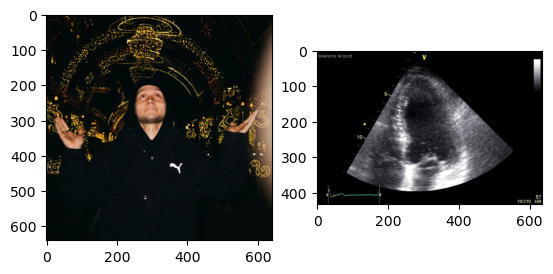

In [42]:
view_images(images)

# Перевести изображения в черно-белое

In [43]:
# Перевод в LAB 
images_LAB = [cv2.cvtColor(image, cv2.COLOR_RGB2LAB) for image in images]
# только канал L 
images_L = [image[...,0] for image in images_LAB]

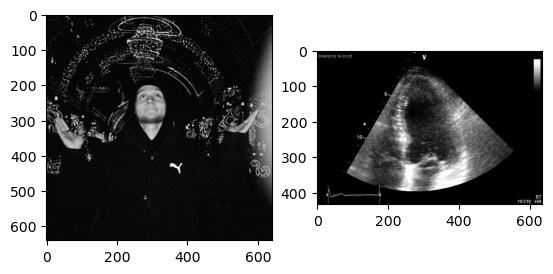

In [44]:
view_images(images_L, cmap ='gray')

# Получить гистограммы изображений

In [45]:
def get_hist(image):
    histogram, bin_edges = np.histogram(image, bins=256)
    # plt.plot(bin_edges[0:-1], histogram) 
    ax = plt.hist(image.ravel(), bins = 256)
    
    plt.show()

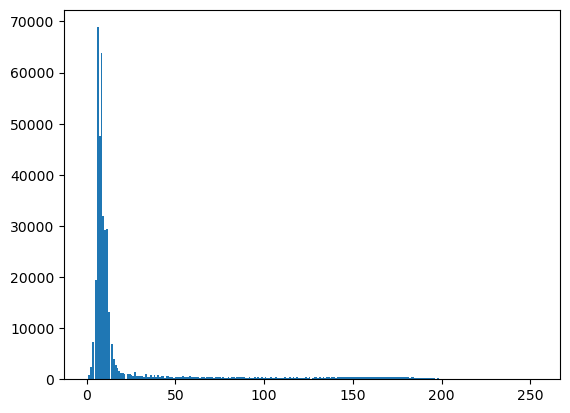

In [46]:
get_hist(images_L[0])

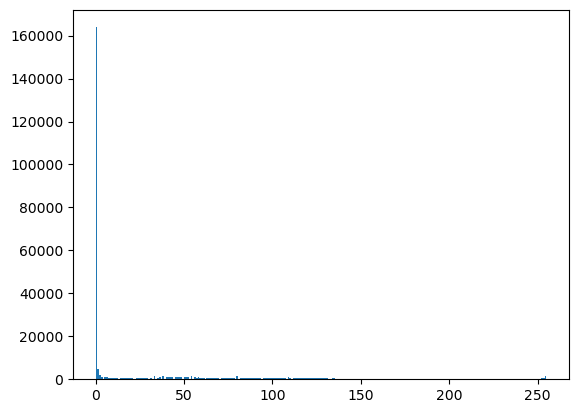

In [47]:
get_hist(images_L[1])

# Провести нормализацию гистограмм

In [48]:

def hist_normalization(img, a=0, b=255):
	# get max and min
	c = img.min()
	d = img.max()
 
	out = img.copy()
 
	# normalization
	out = (b-a) / (d - c) * (out - c) + a
	out[out < a] = a
	out[out > b] = b
	out = out.astype(np.uint8)
	
	return out


In [49]:
images_L_norm = [hist_normalization(image,0,255) for image in images_L]

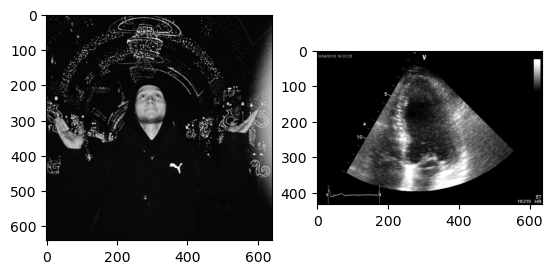

In [50]:
view_images(images_L_norm)

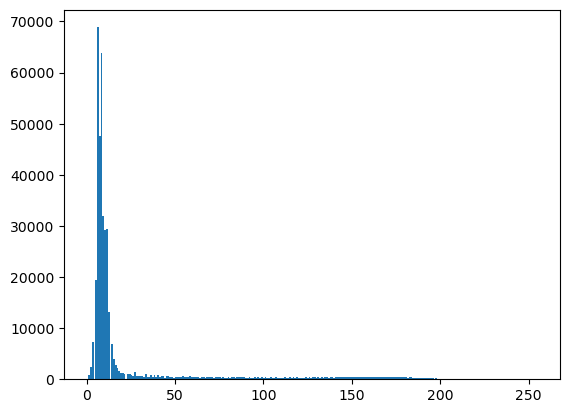

In [51]:
get_hist(images_L_norm[0])

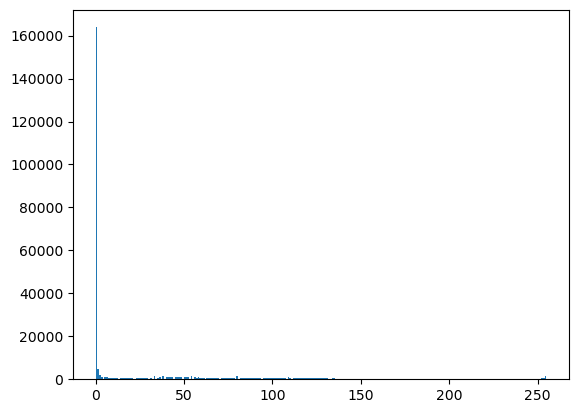

In [52]:
get_hist(images_L_norm[1])

# Провести эквализацию гистограмм

In [53]:
def get_equalization(image):
    h, w = image.shape
    hist, bins = np.histogram(image, 256)
    cdf = hist.cumsum()
    cdf = (cdf-cdf[0])*255/(cdf[-1]-1)
    cdf = cdf.astype(np.uint8)# Transform from float64 back to unit8
    result = np.zeros((h, w, 1), dtype =np.uint8)
    result = cdf[image]
    return result

In [54]:
images_L_equ = [get_equalization(image) for image in images_L]

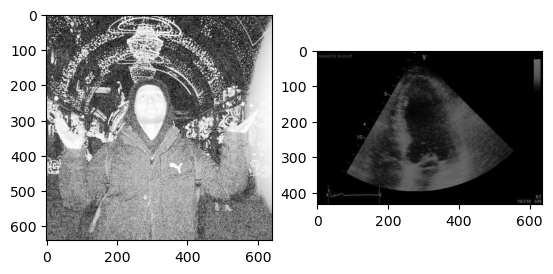

In [55]:
view_images(images_L_equ)

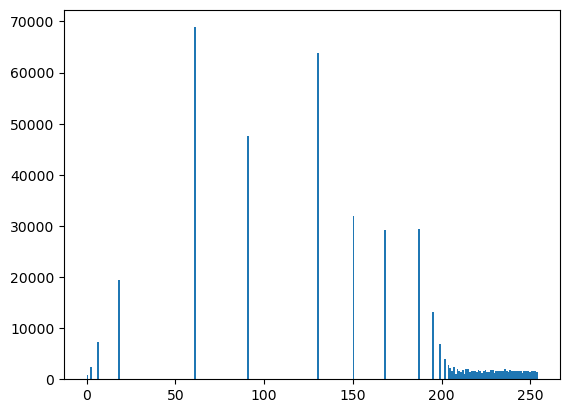

In [56]:
get_hist(images_L_equ[0])

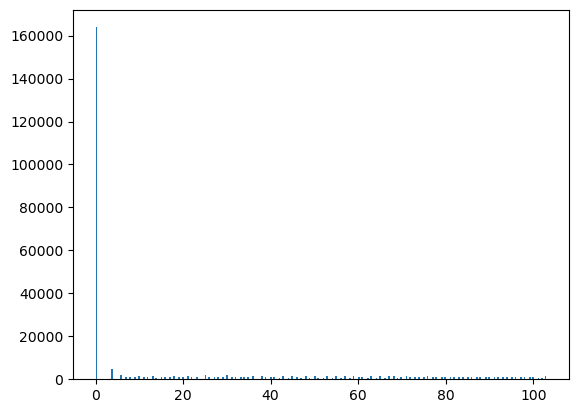

In [57]:
get_hist(images_L_equ[1])

#  Провести преобразование гистограммы по произвольно заданной функции распределения

In [58]:
def hist_match(source, template):
    

    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)


    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)

In [59]:
new_img1 = hist_match(images_L[0],images_L[1])
new_img2 = hist_match(images_L[1],images_L[0])
new_img = [new_img1, new_img2]

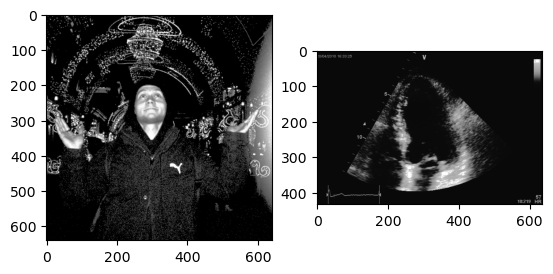

In [60]:
view_images(new_img)

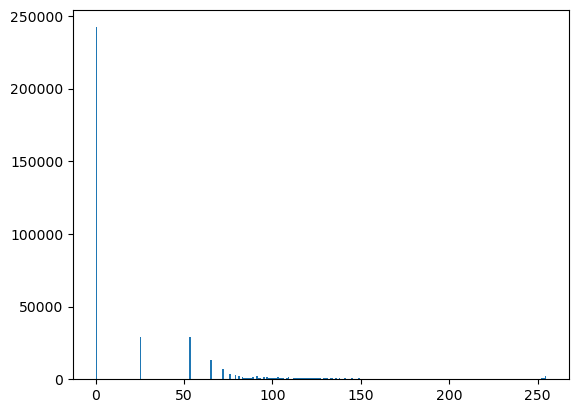

In [61]:
get_hist(new_img[0])

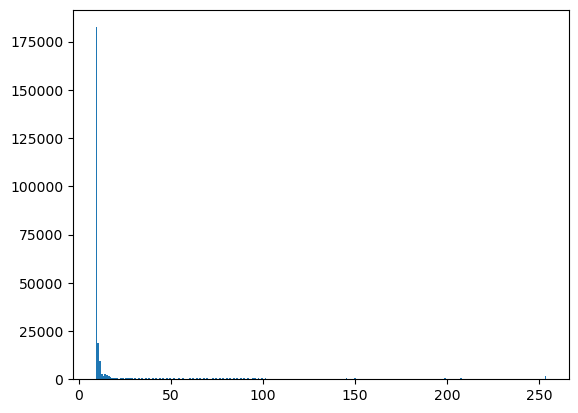

In [62]:
get_hist(new_img[1])